In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import steplib as msl

In [2]:
meter_df = pd.read_csv("DataGathering/output.csv")
state_df = pd.read_csv('output.csv')
steps_df = pd.read_csv("DataGathering/steps.csv")

In [3]:
start = 0
end = len(meter_df["datetime"])

In [4]:
def chart(data_in, states):
    x=pd.to_datetime(meter_df['datetime'])[start:end]
    y=data_in [start:end]
    plt.figure(figsize=(10,5))
    plt.plot(x,y, color='red', marker='o')
    plt.title(data_in.name)
    plt.xlabel('datetime')
    plt.ylabel('accx')
    #show x label every 800
    plt.xticks(x[::800])
    plt.xticks(rotation=90)
    #add rectangles

    plt.show()

In [5]:
def chart2(data_in):
    x=pd.to_datetime(meter_df['datetime'])[start:end]
    y=data_in[start:end]
    plt.figure(figsize=(10,5))
    plt.plot(x,y, color='red', marker='o')
    plt.xlabel('datetime')
    plt.ylabel('accx')
    #show x label every 800
    plt.xticks(x[::800])
    plt.xticks(rotation=90)
    #add rectangles
    for i in range(len(steps_df.iloc[:,0])):
        plt.axvline(x = pd.to_datetime(steps_df.iloc[:,0][i]), color = 'b', label = 'axvline - full height')
    plt.show()

In [6]:
steps_df.iloc[:,0][0]

'2023-11-18 23:16:04.425'

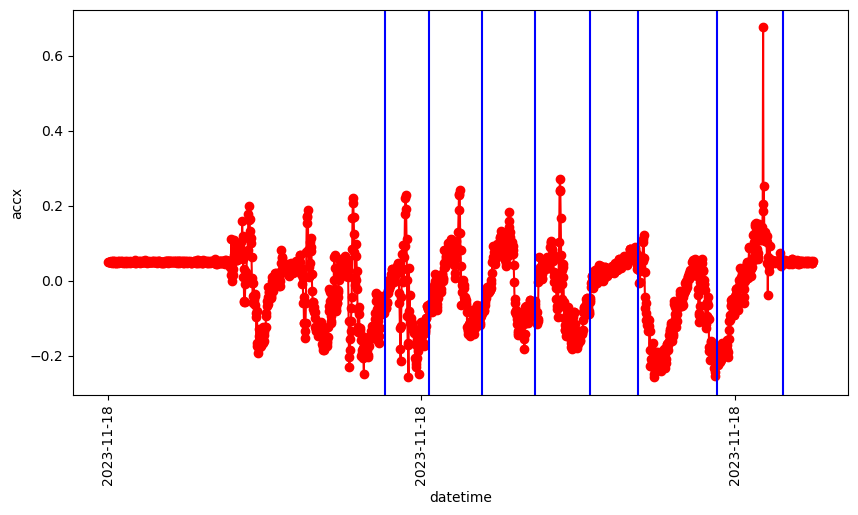

In [7]:
data = meter_df['accx']
chart2(data)

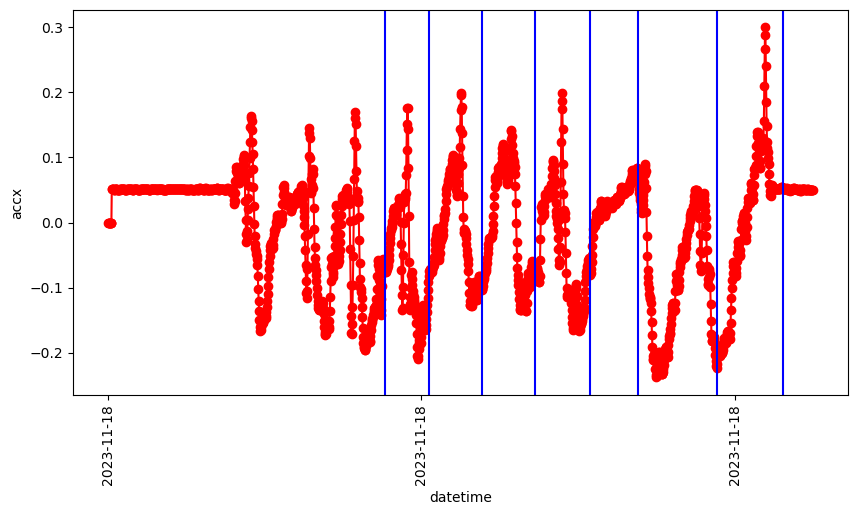

In [8]:
#apply filter 0.0158467315853596	0.0457943754888393	0.121235976281198	0.200244477464560	0.233756878360087	0.200244477464560	0.121235976281198	0.0457943754888393	0.0158467315853596
data = msl.apply_filter(data, [0.0158467315853596,0.0457943754888393,0.121235976281198,0.200244477464560,0.233756878360087,0.200244477464560,0.121235976281198,0.0457943754888393,0.0158467315853596])
chart2(data)

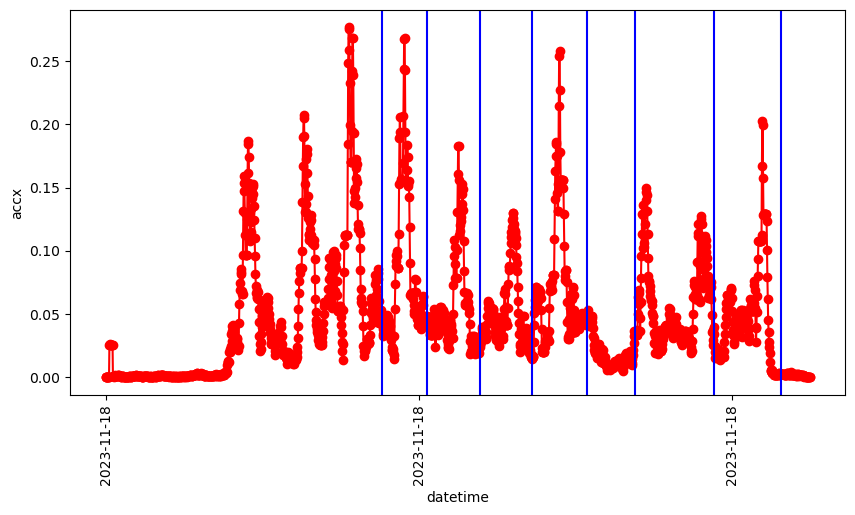

In [9]:
data = msl.max_difference(data, 10)
chart2(data)

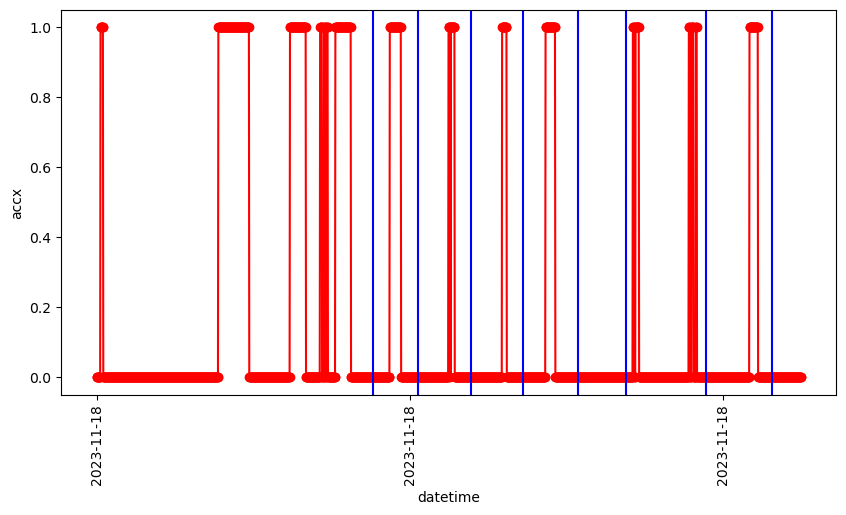

In [10]:
data = msl.detect_outliers(data, 1.2)
chart2(data)

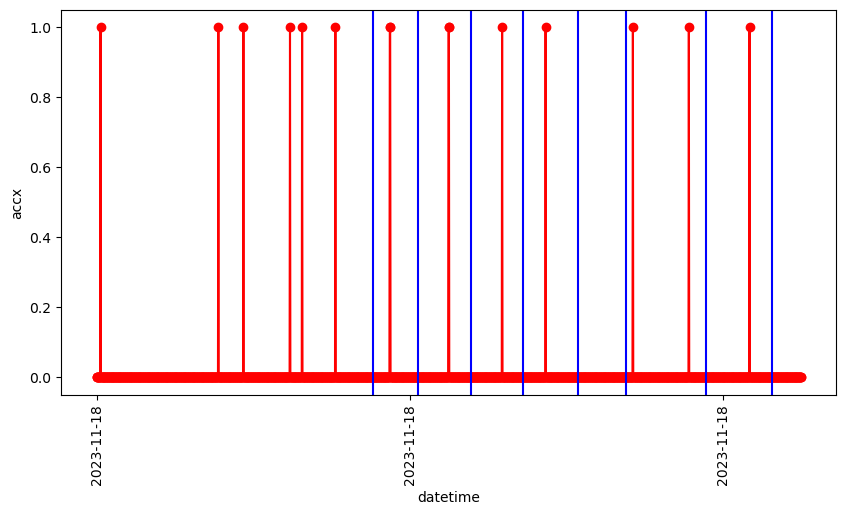

In [11]:
data = msl.post_processing(data, 1000, 75)
chart2(data)